In [1]:
"""
Train convex LassoNet models on a synthetic classification dataset using conve|x optimization.
"""

import sys
sys.path.append("..")

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from convex_nn.private.utils.data import gen_classification_data


from convex_nn.models import ConvexGatedReLU, ConvexReLU
from convex_nn.solvers import RFISTA, AL
from convex_nn.regularizers import NeuronGL1
from convex_nn.metrics import Metrics
from convex_nn.activations import sample_gate_vectors
from convex_nn.optimize import optimize_model, optimize

In [3]:
# Generate realizable synthetic classification problem (ie. Figure 1)
n_train = 1000
n_test = 1000
d = 50
hidden_units = 100
kappa = 10  # condition number

(X_train, y_train), (X_test, y_test) = gen_classification_data(123, n_train, n_test, d, hidden_units, kappa)

In [4]:
lam = 0.001
max_neurons = 500

In [5]:
# Instantiate convex model and other options.
G = sample_gate_vectors(np.random.default_rng(123), d, max_neurons)
model = ConvexGatedReLU(G)
solver = RFISTA(model)
regularizer = NeuronGL1(lam)
metrics = Metrics(metric_freq=1, model_loss=True, train_accuracy=True, test_accuracy=True, neuron_sparsity=True)

In [6]:
grelu_model, grelu_metrics = optimize_model(
    model,
    solver,
    metrics,
    X_train, 
    y_train, 
    X_test, 
    y_test,
    regularizer,
    verbose=True,
)

INFO:convex_nn:Pre-Optimization Metrics: Train Set objective: 0.5, Train Set grad_norm: 0.08310095965862274, Train Set base_objective: 0.5, Train Set accuracy: 0.0, Test Set nc_accuracy: 0.0, group_sparsity: 1.0, 


fista:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.5, Train Set grad_norm: 0.08310095965862274, Train Set base_objective: 0.5, Train Set accuracy: 0.0, Test Set nc_accuracy: 0.0, group_sparsity: 1.0, 
Train Set objective: 0.2054232711791992, Train Set grad_norm: 0.011401686817407608, Train Set base_objective: 0.2054232711791992, Train Set accuracy: 0.947, Test Set nc_accuracy: 0.916, group_sparsity: 0.0, 
Train Set objective: 0.16740042877197264, Train Set grad_norm: 0.003129787277430296, Train Set base_objective: 0.16740042877197264, Train Set accuracy: 0.929, Test Set nc_accuracy: 0.924, group_sparsity: 0.0, 
Train Set objective: 0.15446463775634767, Train Set grad_norm: 0.0010319395223632455, Train Set base_objective: 0.15446463775634767, Train Set accuracy: 0.937, Test Set nc_accuracy: 0.927, group_sparsity: 0.0, 
Train Set objective: 0.1476056365966797, Train Set grad_norm: 0.0007143467664718628, Train Set base_objective: 0.1476056365966797, Train Set accuracy: 0.942, Test Set nc_accuracy: 0.928, group_spars

Train Set objective: 0.1165060043334961, Train Set grad_norm: 2.116067889801343e-06, Train Set base_objective: 0.1165060043334961, Train Set accuracy: 1.0, Test Set nc_accuracy: 0.939, group_sparsity: 0.184, 
Train Set objective: 0.11638839530944825, Train Set grad_norm: 2.1786242996313376e-06, Train Set base_objective: 0.11638839530944825, Train Set accuracy: 1.0, Test Set nc_accuracy: 0.939, group_sparsity: 0.19, 
Train Set objective: 0.11627289199829101, Train Set grad_norm: 2.025742105615791e-06, Train Set base_objective: 0.11627289199829101, Train Set accuracy: 1.0, Test Set nc_accuracy: 0.94, group_sparsity: 0.202, 
Train Set objective: 0.11615989303588867, Train Set grad_norm: 1.8801470105245244e-06, Train Set base_objective: 0.11615989303588867, Train Set accuracy: 1.0, Test Set nc_accuracy: 0.94, group_sparsity: 0.216, 
Train Set objective: 0.11604559326171875, Train Set grad_norm: 2.05888341042737e-06, Train Set base_objective: 0.11604559326171875, Train Set accuracy: 1.0, Te

INFO:convex_nn:Termination criterion satisfied at iteration 60/10000. Exiting optimization loop.
INFO:convex_nn:Post-Optimization Metrics: Train Set objective: 0.11494963073730469, Train Set grad_norm: 6.577050726264133e-07, Train Set base_objective: 0.11494963073730469, Train Set accuracy: 1.0, Test Set nc_accuracy: 0.939, group_sparsity: 0.416, 


Train Set objective: 0.1151543197631836, Train Set grad_norm: 3.5994326026411727e-06, Train Set base_objective: 0.1151543197631836, Train Set accuracy: 1.0, Test Set nc_accuracy: 0.938, group_sparsity: 0.384, 
Train Set objective: 0.11508137512207031, Train Set grad_norm: 2.5376566554768942e-06, Train Set base_objective: 0.11508137512207031, Train Set accuracy: 1.0, Test Set nc_accuracy: 0.942, group_sparsity: 0.388, 
Train Set objective: 0.1150115203857422, Train Set grad_norm: 1.0109782806466683e-06, Train Set base_objective: 0.1150115203857422, Train Set accuracy: 1.0, Test Set nc_accuracy: 0.939, group_sparsity: 0.398, 
Train Set objective: 0.11494963073730469, Train Set grad_norm: 6.577050726264133e-07, Train Set base_objective: 0.11494963073730469, Train Set accuracy: 1.0, Test Set nc_accuracy: 0.939, group_sparsity: 0.416, 


In [7]:
model = ConvexReLU(G)
solver = AL(model)
relu_model, relu_metrics = optimize_model(
    model,
    solver,
    metrics,
    X_train, 
    y_train, 
    X_test, 
    y_test,
    regularizer,
    verbose=True,
)

INFO:convex_nn:Pre-Optimization Metrics: Train Set objective: 0.5, Train Set grad_norm: 0.1662019044160843, Train Set base_objective: 0.5, Train Set accuracy: 0.0, Test Set nc_accuracy: 0.0, group_sparsity: 1.0, 


Outer al:   0%|          | 0/10000 [00:00<?, ?it/s]

Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.5, Train Set grad_norm: 0.1662019044160843, Train Set base_objective: 0.5, Train Set accuracy: 0.0, Test Set nc_accuracy: 0.0, group_sparsity: 1.0, 
Train Set objective: 0.4194059988260269, Train Set grad_norm: 0.07088924944400787, Train Set base_objective: 0.37433068656921387, Train Set accuracy: 0.947, Test Set nc_accuracy: 0.581, group_sparsity: 0.0, 
Train Set objective: 0.37528511124849323, Train Set grad_norm: 0.04448021575808525, Train Set base_objective: 0.35905988502502445, Train Set accuracy: 0.958, Test Set nc_accuracy: 0.88, group_sparsity: 0.0, 
Train Set objective: 0.33343766897916793, Train Set grad_norm: 0.033510807901620865, Train Set base_objective: 0.30462467193603515, Train Set accuracy: 0.95, Test Set nc_accuracy: 0.907, group_sparsity: 0.0, 
Train Set objective: 0.29491364404559134, Train Set grad_norm: 0.026287222281098366, Train Set base_objective: 0.27869908332824705, Train Set accuracy: 0.926, Test Set nc_accuracy: 0.924, group_sparsity:

INFO:convex_nn:*Inner* termination criterion satisfied at iteration 10/10000. Exiting *inner* optimization loop.


Train Set objective: 0.19003125701099632, Train Set grad_norm: 0.0015134759014472365, Train Set base_objective: 0.17601106643676756, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.0, 
Train Set objective: 0.18489198637753726, Train Set grad_norm: 0.0008515887893736362, Train Set base_objective: 0.17175760650634767, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.0, 


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.18489198637753726, Train Set grad_norm: 0.0008515887893736362, Train Set base_objective: 0.17175760650634767, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.0, 
Train Set objective: 0.19398654390871525, Train Set grad_norm: 0.005411545746028423, Train Set base_objective: 0.17737752151489258, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.005, 
Train Set objective: 0.1922939510345459, Train Set grad_norm: 0.002617055084556341, Train Set base_objective: 0.17571074676513673, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.0, 


INFO:convex_nn:*Inner* termination criterion satisfied at iteration 4/10000. Exiting *inner* optimization loop.


Train Set objective: 0.19122074333578348, Train Set grad_norm: 0.0015497180866077542, Train Set base_objective: 0.1767457618713379, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.0, 
Train Set objective: 0.19026978860050442, Train Set grad_norm: 0.000987596926279366, Train Set base_objective: 0.1766186103820801, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.0, 


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.19026978860050442, Train Set grad_norm: 0.000987596926279366, Train Set base_objective: 0.1766186103820801, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.0, 
Train Set objective: 0.20023842497169972, Train Set grad_norm: 0.00814005360007286, Train Set base_objective: 0.18125890350341797, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.004, 
Train Set objective: 0.19847680808603763, Train Set grad_norm: 0.005199583247303963, Train Set base_objective: 0.1805760040283203, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.0, 
Train Set objective: 0.19735690566897393, Train Set grad_norm: 0.00269663636572659, Train Set base_objective: 0.18179209518432618, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.0, 
Train Set objective: 0.1964652518182993, Train Set grad_norm: 0.0017368784174323082, Train Set base_objective: 0.18211380004882813, Train Set accuracy: 0.911, Tes

INFO:convex_nn:*Inner* termination criterion satisfied at iteration 7/10000. Exiting *inner* optimization loop.


Train Set objective: 0.19399142714589834, Train Set grad_norm: 0.0009320243843831122, Train Set base_objective: 0.1828532943725586, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.0, 


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.19399142714589834, Train Set grad_norm: 0.0009320243843831122, Train Set base_objective: 0.1828532943725586, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.0, 
Train Set objective: 0.18968790807574987, Train Set grad_norm: 0.004220522008836269, Train Set base_objective: 0.18145121765136718, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.042, 
Train Set objective: 0.1892149298153818, Train Set grad_norm: 0.0009139136527664959, Train Set base_objective: 0.1817621536254883, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.0, 
Train Set objective: 0.18899976987019182, Train Set grad_norm: 0.0006233478779904544, Train Set base_objective: 0.1817311897277832, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.0, 
Train Set objective: 0.1887961914539337, Train Set grad_norm: 0.00043220497900620103, Train Set base_objective: 0.18166124725341795, Train Set accuracy: 0.911,

Train Set objective: 0.18308820397034287, Train Set grad_norm: 5.281846097204834e-05, Train Set base_objective: 0.17733699417114257, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.0, 
Train Set objective: 0.18293542282283307, Train Set grad_norm: 5.715559746022336e-05, Train Set base_objective: 0.17723419570922852, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.0, 
Train Set objective: 0.18278296384215353, Train Set grad_norm: 5.1441376854199916e-05, Train Set base_objective: 0.1771227912902832, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.0, 
Train Set objective: 0.18263289352878928, Train Set grad_norm: 5.8327761507825926e-05, Train Set base_objective: 0.17702463150024414, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.0, 
Train Set objective: 0.18248444272577763, Train Set grad_norm: 5.602763849310577e-05, Train Set base_objective: 0.17691804504394532, Train Set accuracy: 0.

Train Set objective: 0.17837923237308861, Train Set grad_norm: 3.757611193577759e-05, Train Set base_objective: 0.17412936019897463, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.0, 
Train Set objective: 0.17829600583389402, Train Set grad_norm: 3.905402627424337e-05, Train Set base_objective: 0.1740747299194336, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.0, 
Train Set objective: 0.17821323817968368, Train Set grad_norm: 3.6970657674828544e-05, Train Set base_objective: 0.17401645278930664, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.0, 
Train Set objective: 0.1781305768415332, Train Set grad_norm: 3.711377939907834e-05, Train Set base_objective: 0.1739614601135254, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.0, 
Train Set objective: 0.17804900971427562, Train Set grad_norm: 3.174407174810767e-05, Train Set base_objective: 0.17390370178222658, Train Set accuracy: 0.911

Train Set objective: 0.17576134781353175, Train Set grad_norm: 2.5947669200832024e-05, Train Set base_objective: 0.17233949661254883, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.0, 
Train Set objective: 0.17571165102906525, Train Set grad_norm: 2.6832878575078212e-05, Train Set base_objective: 0.17230603790283203, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.0, 
Train Set objective: 0.17566264771856369, Train Set grad_norm: 2.312294782313984e-05, Train Set base_objective: 0.17226837158203126, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.0, 
Train Set objective: 0.17561485465057194, Train Set grad_norm: 2.6955474822898395e-05, Train Set base_objective: 0.17223720169067383, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.0, 
Train Set objective: 0.17556718422286213, Train Set grad_norm: 2.517556094971951e-05, Train Set base_objective: 0.17220003890991212, Train Set accuracy: 

Train Set objective: 0.17420032400265337, Train Set grad_norm: 2.0839595890720375e-05, Train Set base_objective: 0.17123886489868165, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.0, 
Train Set objective: 0.17416914204880596, Train Set grad_norm: 1.6779824363766238e-05, Train Set base_objective: 0.1712141342163086, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.0, 
Train Set objective: 0.17413898066990077, Train Set grad_norm: 1.7439420844311826e-05, Train Set base_objective: 0.17119256591796875, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.0, 
Train Set objective: 0.1741094668507576, Train Set grad_norm: 1.5833631550776772e-05, Train Set base_objective: 0.17117041397094726, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.0, 
Train Set objective: 0.17408062270842492, Train Set grad_norm: 1.4961857232265174e-05, Train Set base_objective: 0.1711501121520996, Train Set accuracy: 0

Train Set objective: 0.1731452012900263, Train Set grad_norm: 9.63625825534109e-06, Train Set base_objective: 0.170501708984375, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.0, 
Train Set objective: 0.17312328179366887, Train Set grad_norm: 9.143044735537842e-06, Train Set base_objective: 0.17048395156860352, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.0, 
Train Set objective: 0.1731014904975891, Train Set grad_norm: 8.635436643089633e-06, Train Set base_objective: 0.17046571350097656, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.0, 
Train Set objective: 0.17307996293716132, Train Set grad_norm: 8.075319783529267e-06, Train Set base_objective: 0.17044815826416015, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.0, 
Train Set objective: 0.17305879922024905, Train Set grad_norm: 7.573243692604592e-06, Train Set base_objective: 0.17043010330200195, Train Set accuracy: 0.911, T

Train Set objective: 0.17244913083314894, Train Set grad_norm: 9.256005796487443e-06, Train Set base_objective: 0.16995145034790038, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.0, 
Train Set objective: 0.1724348678160459, Train Set grad_norm: 6.080458206270123e-06, Train Set base_objective: 0.1699416732788086, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.0, 
Train Set objective: 0.17242089521326126, Train Set grad_norm: 4.317565526434919e-06, Train Set base_objective: 0.1699322967529297, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.0, 
Train Set objective: 0.17240718961320817, Train Set grad_norm: 4.259708930476336e-06, Train Set base_objective: 0.1699234046936035, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.0, 
Train Set objective: 0.17239387836679815, Train Set grad_norm: 5.1371189329074696e-06, Train Set base_objective: 0.16991471862792967, Train Set accuracy: 0.911,

Train Set objective: 0.17196953897736966, Train Set grad_norm: 5.339948984328657e-06, Train Set base_objective: 0.1696316680908203, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.0, 
Train Set objective: 0.17195734025351703, Train Set grad_norm: 4.526202701526927e-06, Train Set base_objective: 0.16962287521362304, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.0, 
Train Set objective: 0.17194542548060415, Train Set grad_norm: 3.0663927645946387e-06, Train Set base_objective: 0.16961347198486326, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.0, 
Train Set objective: 0.1719339463301003, Train Set grad_norm: 2.66384995484259e-06, Train Set base_objective: 0.16960512161254884, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.0, 
Train Set objective: 0.17192291673645377, Train Set grad_norm: 2.5933886718121357e-06, Train Set base_objective: 0.16959685897827148, Train Set accuracy: 0.91

Train Set objective: 0.17160837218165398, Train Set grad_norm: 4.629348040907644e-06, Train Set base_objective: 0.16939395904541016, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.0, 
Train Set objective: 0.17160215246118604, Train Set grad_norm: 3.955269221478375e-06, Train Set base_objective: 0.1693903579711914, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.0, 
Train Set objective: 0.17159580134227873, Train Set grad_norm: 3.164104100505938e-06, Train Set base_objective: 0.16938655471801758, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.0, 
Train Set objective: 0.1715893208067864, Train Set grad_norm: 3.110141733486671e-06, Train Set base_objective: 0.16938271331787108, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.0, 
Train Set objective: 0.1715827283207327, Train Set grad_norm: 3.62742252946191e-06, Train Set base_objective: 0.16937825775146484, Train Set accuracy: 0.911, 

Train Set objective: 0.1713421232048422, Train Set grad_norm: 3.6363235267344862e-06, Train Set base_objective: 0.16922345352172852, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.0, 
Train Set objective: 0.17133618392795325, Train Set grad_norm: 2.61579316429561e-06, Train Set base_objective: 0.1692196388244629, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.0, 
Train Set objective: 0.17133051013201475, Train Set grad_norm: 2.4495013803971233e-06, Train Set base_objective: 0.16921629333496094, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.0, 
Train Set objective: 0.17132488721609118, Train Set grad_norm: 2.6667378278943943e-06, Train Set base_objective: 0.16921253585815432, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.0, 
Train Set objective: 0.17131932622008025, Train Set grad_norm: 2.857285380741814e-06, Train Set base_objective: 0.16920912551879883, Train Set accuracy: 0.9

Train Set objective: 0.17117766328155995, Train Set grad_norm: 2.243213430119795e-06, Train Set base_objective: 0.16912803649902344, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.0, 
Train Set objective: 0.17117463085241616, Train Set grad_norm: 2.547998519730754e-06, Train Set base_objective: 0.16912631607055664, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.0, 
Train Set objective: 0.17117165550403296, Train Set grad_norm: 2.3904506178951124e-06, Train Set base_objective: 0.16912503433227538, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.0, 
Train Set objective: 0.17116877038404343, Train Set grad_norm: 2.7521487027115654e-06, Train Set base_objective: 0.16912334060668943, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.0, 
Train Set objective: 0.17116602409258486, Train Set grad_norm: 2.169775825677789e-06, Train Set base_objective: 0.16912239456176759, Train Set accuracy: 0

Train Set objective: 0.17107758200727402, Train Set grad_norm: 1.3540009149437537e-06, Train Set base_objective: 0.1690829277038574, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.915, group_sparsity: 0.0, 
Train Set objective: 0.1710748185068369, Train Set grad_norm: 1.7625758346184739e-06, Train Set base_objective: 0.16908143615722657, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.915, group_sparsity: 0.0, 
Train Set objective: 0.17107210501469672, Train Set grad_norm: 1.5914955611151527e-06, Train Set base_objective: 0.16907937622070313, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.915, group_sparsity: 0.0, 
Train Set objective: 0.17106951685249805, Train Set grad_norm: 1.4565071069227997e-06, Train Set base_objective: 0.16907791519165039, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.915, group_sparsity: 0.0, 
Train Set objective: 0.1710670832321048, Train Set grad_norm: 1.1806276916104252e-06, Train Set base_objective: 0.1690760841369629, Train Set accuracy: 0.

INFO:convex_nn:*Inner* termination criterion satisfied at iteration 455/10000. Exiting *inner* optimization loop.


Train Set objective: 0.17105711046233774, Train Set grad_norm: 1.5687830909882905e-06, Train Set base_objective: 0.1690710105895996, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.915, group_sparsity: 0.0, 
Train Set objective: 0.1710567543823272, Train Set grad_norm: 1.153246216745174e-06, Train Set base_objective: 0.16907080841064454, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.915, group_sparsity: 0.0, 
Train Set objective: 0.17105629049055276, Train Set grad_norm: 9.557605835652794e-07, Train Set base_objective: 0.16907042694091795, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.915, group_sparsity: 0.0, 


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.17105629049055276, Train Set grad_norm: 9.557605835652794e-07, Train Set base_objective: 0.16907042694091795, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.915, group_sparsity: 0.0, 
Train Set objective: 0.1763177831657231, Train Set grad_norm: 0.000707731582224369, Train Set base_objective: 0.1704591751098633, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.072, 
Train Set objective: 0.1761406303793192, Train Set grad_norm: 0.00027115223929286003, Train Set base_objective: 0.1705662307739258, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.007, 
Train Set objective: 0.17601734460890295, Train Set grad_norm: 0.00019057837198488414, Train Set base_objective: 0.17090887451171877, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.014, 
Train Set objective: 0.17592011592164636, Train Set grad_norm: 0.00011915848153876141, Train Set base_objective: 0.17106929016113281, Train Set accuracy:

Train Set objective: 0.17537934036739172, Train Set grad_norm: 1.0681887943064794e-06, Train Set base_objective: 0.17245457839965822, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.005, 


INFO:convex_nn:*Inner* termination criterion satisfied at iteration 43/10000. Exiting *inner* optimization loop.


Train Set objective: 0.17537601124309005, Train Set grad_norm: 1.6416926200690796e-06, Train Set base_objective: 0.1724580307006836, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.003, 
Train Set objective: 0.17537267539277673, Train Set grad_norm: 9.819893875828711e-07, Train Set base_objective: 0.17246174240112305, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.005, 


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.17537267539277673, Train Set grad_norm: 9.819893875828711e-07, Train Set base_objective: 0.17246174240112305, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.005, 
Train Set objective: 0.17662740578502417, Train Set grad_norm: 3.170006311847828e-05, Train Set base_objective: 0.17279314422607422, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.259, 
Train Set objective: 0.1766162712238729, Train Set grad_norm: 1.274736860068515e-05, Train Set base_objective: 0.17278145599365236, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.006, 
Train Set objective: 0.1766081611979753, Train Set grad_norm: 1.3365380254981574e-05, Train Set base_objective: 0.17289153289794923, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.156, 
Train Set objective: 0.17660194946452976, Train Set grad_norm: 6.008365289744688e-06, Train Set base_objective: 0.17290178298950196, Train Set accura

INFO:convex_nn:*Inner* termination criterion satisfied at iteration 26/10000. Exiting *inner* optimization loop.


Train Set objective: 0.17654424180835487, Train Set grad_norm: 1.137095978265279e-06, Train Set base_objective: 0.17311466598510744, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.003, 
Train Set objective: 0.17654159318841994, Train Set grad_norm: 9.842644885793561e-07, Train Set base_objective: 0.1731177978515625, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.004, 


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.17654159318841994, Train Set grad_norm: 9.842644885793561e-07, Train Set base_objective: 0.1731177978515625, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.004, 
Train Set objective: 0.17718340599350632, Train Set grad_norm: 6.984516858210554e-06, Train Set base_objective: 0.1732779655456543, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.347, 
Train Set objective: 0.17717930392920972, Train Set grad_norm: 4.815222382603679e-06, Train Set base_objective: 0.17325270080566407, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.005, 
Train Set objective: 0.17717612423747778, Train Set grad_norm: 4.767399786942406e-06, Train Set base_objective: 0.17330645751953125, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.21, 
Train Set objective: 0.1771734297182411, Train Set grad_norm: 3.220610096832388e-06, Train Set base_objective: 0.1733070945739746, Train Set accuracy: 

INFO:convex_nn:*Inner* termination criterion satisfied at iteration 26/10000. Exiting *inner* optimization loop.


Train Set objective: 0.17712213307246566, Train Set grad_norm: 1.1769072898459854e-06, Train Set base_objective: 0.1734365119934082, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.006, 
Train Set objective: 0.17711910511925816, Train Set grad_norm: 1.328951498180686e-06, Train Set base_objective: 0.17344150924682616, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.009, 
Train Set objective: 0.17711606554500758, Train Set grad_norm: 9.840961183726904e-07, Train Set base_objective: 0.17344643783569336, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.008, 


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.17711606554500758, Train Set grad_norm: 9.840961183726904e-07, Train Set base_objective: 0.17344643783569336, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.008, 
Train Set objective: 0.17741791641898452, Train Set grad_norm: 3.6010369512951e-06, Train Set base_objective: 0.17353502655029296, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.408, 
Train Set objective: 0.17741551999002697, Train Set grad_norm: 2.65235394181218e-06, Train Set base_objective: 0.17350574493408205, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.019, 
Train Set objective: 0.17741375000216067, Train Set grad_norm: 3.2525258575333282e-06, Train Set base_objective: 0.17352745056152344, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.203, 
Train Set objective: 0.17741202462837102, Train Set grad_norm: 1.5904562360447017e-06, Train Set base_objective: 0.1735329399108887, Train Set accurac

INFO:convex_nn:*Inner* termination criterion satisfied at iteration 12/10000. Exiting *inner* optimization loop.


Train Set objective: 0.17740389933995904, Train Set grad_norm: 1.0234592764390982e-06, Train Set base_objective: 0.17356013107299806, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.025, 
Train Set objective: 0.17740240769833326, Train Set grad_norm: 1.9825497474812437e-06, Train Set base_objective: 0.1735630760192871, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.032, 
Train Set objective: 0.1774006991572678, Train Set grad_norm: 9.897659083435428e-07, Train Set base_objective: 0.17356625366210937, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.025, 


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.1774006991572678, Train Set grad_norm: 9.897659083435428e-07, Train Set base_objective: 0.17356625366210937, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.025, 
Train Set objective: 0.17759944555163384, Train Set grad_norm: 7.319250016735168e-06, Train Set base_objective: 0.17365760040283204, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.485, 
Train Set objective: 0.1775966629125178, Train Set grad_norm: 1.4847380498395069e-06, Train Set base_objective: 0.1736230163574219, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.033, 
Train Set objective: 0.1775958248153329, Train Set grad_norm: 3.064374368477729e-06, Train Set base_objective: 0.17362101364135743, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.095, 
Train Set objective: 0.17759468128532171, Train Set grad_norm: 1.1906856798304943e-06, Train Set base_objective: 0.17362411880493164, Train Set accurac

INFO:convex_nn:*Inner* termination criterion satisfied at iteration 12/10000. Exiting *inner* optimization loop.


Train Set objective: 0.1775845298320055, Train Set grad_norm: 9.894307595459395e-07, Train Set base_objective: 0.17364847564697267, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.058, 


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.1775845298320055, Train Set grad_norm: 9.894307595459395e-07, Train Set base_objective: 0.17364847564697267, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.058, 
Train Set objective: 0.17770821909233928, Train Set grad_norm: 1.2443311788956635e-05, Train Set base_objective: 0.17373036575317383, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.607, 
Train Set objective: 0.17770643110945822, Train Set grad_norm: 5.613336725218687e-06, Train Set base_objective: 0.17371952438354493, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.076, 
Train Set objective: 0.17770538146421314, Train Set grad_norm: 1.7719947891237098e-06, Train Set base_objective: 0.17370974731445313, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.087, 
Train Set objective: 0.17770454293861987, Train Set grad_norm: 1.1453893193902331e-06, Train Set base_objective: 0.173702938079834, Train Set accur

INFO:convex_nn:*Outer* termination criterion satisfied at iteration 9/10000. Exiting *outer* optimization loop.


Train Set objective: 0.1777028750963509, Train Set grad_norm: 1.015395014292153e-06, Train Set base_objective: 0.1736968650817871, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.112, 
Train Set objective: 0.17770194380357862, Train Set grad_norm: 1.4244724297896028e-06, Train Set base_objective: 0.17369654846191407, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.123, 
Train Set objective: 0.17770085478201508, Train Set grad_norm: 9.855989446805324e-07, Train Set base_objective: 0.17369752883911133, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.129, 


INFO:convex_nn:Post-Optimization Metrics: Train Set objective: 0.17770085478201508, Train Set grad_norm: 9.855989446805324e-07, Train Set base_objective: 0.17369752883911133, Train Set accuracy: 0.911, Test Set nc_accuracy: 0.914, group_sparsity: 0.129, 


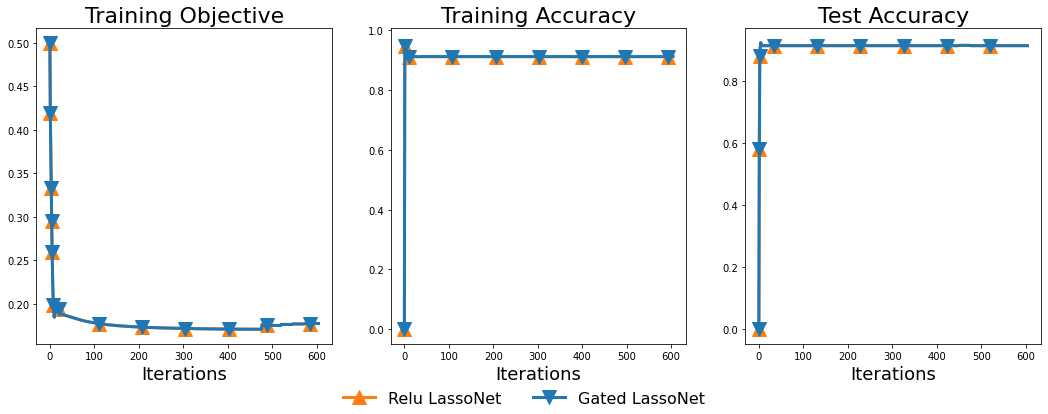

In [8]:
fig = plt.figure(figsize=(18,6))
spec = fig.add_gridspec(ncols=3, nrows=1)
ax0 = fig.add_subplot(spec[0, 0])

ax0.plot(np.arange(len(relu_metrics.objective)), 
         relu_metrics.objective, 
         label="Relu LassoNet", 
         color="#ff7f0e",
         marker="^",
         markevery=0.1,
         markersize=14,
         linewidth="3")

ax0.plot(np.arange(len(grelu_metrics.objective)), 
         grelu_metrics.objective, 
         label="Gated LassoNet", 
         color="#1f77b4",
         marker="v", 
         markevery=0.1,
         markersize=14,
         linewidth="3"
        )

ax0.set_title("Training Objective", fontsize=22)
ax0.set_xlabel("Iterations", fontsize=18)

ax1 = fig.add_subplot(spec[0, 1])

ax1.plot(np.arange(len(relu_metrics.train_accuracy)), 
         relu_metrics.train_accuracy, 
         label="Relu LassoNet", 
         color="#ff7f0e",
         marker="^",
         markevery=0.1,
         markersize=14,
         linewidth="3")

ax1.plot(np.arange(len(grelu_metrics.train_accuracy)), 
         grelu_metrics.train_accuracy, 
         label="Gated LassoNet", 
         color="#1f77b4",
         marker="v", 
         markevery=0.1,
         markersize=14,
         linewidth="3"
        )

ax1.set_title("Training Accuracy", fontsize=22)
ax1.set_xlabel("Iterations", fontsize=18)

ax2 = fig.add_subplot(spec[0, 2])


ax2.plot(np.arange(len(relu_metrics.test_accuracy)), 
         relu_metrics.test_accuracy, 
         label="Relu LassoNet", 
         color="#ff7f0e",
         marker="^",
         markevery=0.1,
         markersize=14,
         linewidth="3")

ax2.plot(np.arange(len(grelu_metrics.test_accuracy)), 
         grelu_metrics.test_accuracy, 
         label="Gated LassoNet", 
         color="#1f77b4",
         marker="v", 
         markevery=0.1,
         markersize=14,
         linewidth="3"
        )

ax2.set_title("Test Accuracy", fontsize=22)
ax2.set_xlabel("Iterations", fontsize=18)
handles, labels = ax0.get_legend_handles_labels()
legend = fig.legend(
    handles=handles,
    labels=labels,
    loc="lower center",
    borderaxespad=0.1,
    fancybox=False,
    shadow=False,
    ncol=2,
    fontsize=16,
    frameon=False,
)
fig.subplots_adjust(
    bottom=0.15,
)